In [2]:
import pandas as pd

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/thomaspernet/PythonFinanceClass/master/QuantitativeFinance/Datasets/R_data/2016_10_12_bank_prices.csv', sep = ";")

In [11]:
df.head()

,Date,MSCIWorldpreviousdayquote,FTSEALLWORLDINDEX,Eurostoxx,Eurostoxxbanks,USbanksDowJonesindex,VIXindexofVolatilityonChicagoDerivativesmarket%,FXEURUSD,FXEURGBP,FXEURCHF,...,CREDITSUISSEGROUPAGREG,BARCLAYSPLCGB,HSBCHOLDINGSPLCGB,ROYALBANKOFSCOTLANDGROUPGB,NORDEABANKAB,JPMORGANCHASECo,CITIGROUPINC,BANKOFAMERICA,GOLDMANSACHSGroup,MORGANSTANLEY
0,12/10/2016,"1700,33","272,35","339,97","96,14","3839,01","15,77","1,1025","0,89807","1,09108",...,"13,13","171,9","614,3","179,8","88,9","68,31","48,99","16,11","169,04","32,18"
1,11/10/2016,"1700,33","272,81","340,17","95,6","3839,01","15,36","1,1054","0,91182","1,09312",...,"13,18","172,4","618,5",181,88,"68,31","48,99","16,11","169,04","32,18"
2,10/10/2016,"1719,29","275,88","341,98","95,87","3873,53","13,38","1,1139","0,90104","1,09454",...,"13,16","172,3","624,8","178,6","90,3","68,64","49,55","16,3","171,04","32,56"
3,09/10/2016,"1712,4","274,84","339,64","95,51","3847,27","13,48","1,1201","0,90005","1,09423",...,"13,06","173,6","619,5","181,9","90,4","68,11","49,28","16,13","169,83","32,31"
4,08/10/2016,"1712,4","274,84","339,64","95,51","3847,27","13,48","1,1201","0,90005","1,09423",...,"13,06","173,6","619,5","181,9","90,4","68,11","49,28","16,13","169,83","32,31"


In [48]:
df_final = df[['Date','BNPPARIBAS', 'CREDITAGRICOLESA', 'SOCIETEGENERALESA']]
df_final = df_final.set_index('Date')
df_final = df_final.apply(lambda x: x.str.replace(',','.'))

In [50]:
for x in ['BNPPARIBAS', 'CREDITAGRICOLESA', 'SOCIETEGENERALESA']:
    df_final[x] = pd.to_numeric(df_final[x], errors='ignore')

In [51]:
df_final.dtypes

BNPPARIBAS           float64
CREDITAGRICOLESA     float64
SOCIETEGENERALESA    float64
dtype: object

In [52]:
df_final.head()

,BNPPARIBAS,CREDITAGRICOLESA,SOCIETEGENERALESA
Date,,,
12/10/2016,48.355,9.420,33.215
11/10/2016,48.550,9.255,33.040
10/10/2016,49.100,9.189,33.075
09/10/2016,49.310,9.105,32.870
08/10/2016,49.310,9.105,32.870


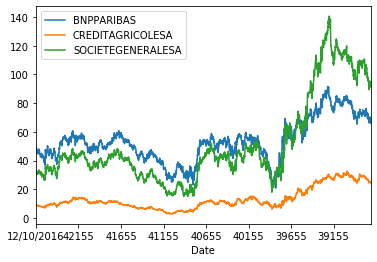

In [53]:
df_final.plot()

In [27]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

Stationartity

In [54]:
df_final.apply(lambda x: adf_test(x))

Results of Augmented Dickey-Fuller test:
test statistic            -1.707166
p-value                    0.427424
# of lags                 23.000000
# of observations       3914.000000
Critical Value (1%)       -3.432022
Critical Value (5%)       -2.862279
Critical Value (10%)      -2.567163
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic            -0.691067
p-value                    0.849050
# of lags                  5.000000
# of observations       3932.000000
Critical Value (1%)       -3.432014
Critical Value (5%)       -2.862275
Critical Value (10%)      -2.567161
dtype: float64
Results of Augmented Dickey-Fuller test:
test statistic            -0.915812
p-value                    0.782721
# of lags                 28.000000
# of observations       3909.000000
Critical Value (1%)       -3.432024
Critical Value (5%)       -2.862280
Critical Value (10%)      -2.567164
dtype: float64


BNPPARIBAS           None
CREDITAGRICOLESA     None
SOCIETEGENERALESA    None
dtype: object

Cointegration

Daily return

In [34]:
df_final.head()

,BNPPARIBAS,CREDITAGRICOLESA,SOCIETEGENERALESA
Date,,,
12/10/2016,48.355,9.42,33.215
11/10/2016,48.55,9.255,33.04
10/10/2016,49.1,9.189,33.075
09/10/2016,49.31,9.105,32.87
08/10/2016,49.31,9.105,32.87


In [55]:
df_return = df_final.copy()
df_return.head()

,BNPPARIBAS,CREDITAGRICOLESA,SOCIETEGENERALESA
Date,,,
12/10/2016,48.355,9.420,33.215
11/10/2016,48.550,9.255,33.040
10/10/2016,49.100,9.189,33.075
09/10/2016,49.310,9.105,32.870
08/10/2016,49.310,9.105,32.870


In [56]:
df_return.dtypes

BNPPARIBAS           float64
CREDITAGRICOLESA     float64
SOCIETEGENERALESA    float64
dtype: object

In [60]:
df_return = df_return.pct_change().dropna()

corr matrix

In [61]:
df_return.corr()

,BNPPARIBAS,CREDITAGRICOLESA,SOCIETEGENERALESA
BNPPARIBAS,1.000000,0.012725,0.011678
CREDITAGRICOLESA,0.012725,1.000000,0.028413
SOCIETEGENERALESA,0.011678,0.028413,1.000000


regress each serei

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
mod1 = smf.ols(formula='BNPPARIBAS ~ CREDITAGRICOLESA + SOCIETEGENERALESA', data=df_return).fit()
mod2 = smf.ols(formula='CREDITAGRICOLESA ~ BNPPARIBAS + SOCIETEGENERALESA', data=df_return).fit()
mod3 = smf.ols(formula='SOCIETEGENERALESA ~ CREDITAGRICOLESA + BNPPARIBAS', data=df_return).fit()